# sklearnの確認問題

## 必要モジュールのインポート

この問題で使うモジュールをインポートします。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_fontja 


## 前準備




### データの読み取り
scikit-learnから提供される`iris`というデータセットを読み込みます。

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

#説明変数の読み取り
data = iris.data
feature_names = iris.feature_names
df_data = pd.DataFrame(data=data, columns=feature_names)

#目的変数の読み取り
target = iris.target
target_names = iris.target_names
df_target = pd.DataFrame(data=target, columns=['target'])

### 問1. 説明変数の把握

1.1. `df_data` の先頭五行を表示してください。

In [3]:
df_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


1.2. `df_data` の行数と列数を表示しましょう。

In [4]:
df_data.shape

(150, 4)

1.3. `df_data` の各列の `mean`, `count`, `std` などの基本特徴量を表示しましょう。


In [5]:
df_data.mean()
df_data.count()
df_data.std()

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

1.4. `df_data` に欠損値がないかを確認しましょう。

In [6]:
print(df_data.isnull().values.sum())

0


### 問2. 目的変数の把握

2.1. `df_target` のうち、ランダムに 10 行表示しましょう。

目的変数の数字はそれぞれ、

- 0 が `setosa`（ヒオウギアヤメ）
- 1 が `versicolor`（ブルーフラッグ）
- 2 が `virginica`（バージニカ）

を指しています。


In [7]:
print(df_target.sample(10))

     target
99        1
35        0
54        1
141       2
115       2
121       2
28        0
117       2
135       2
46        0


### 問3. データの可視化

3.1. x 軸を petal length (cm)、y 軸を petal width (cm)にして散布図を作成しましょう。 ただし、目的変数に応じて点の色と形を変更してください。

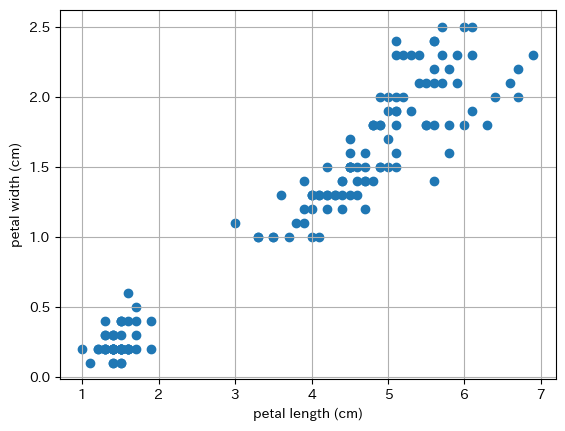

In [8]:
plt.scatter(df_data["petal length (cm)"],df_data["petal width (cm)"])
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")
plt.grid()


## 機械学習


### 問4. データの分割

4.1. iris データを 4:1 に分割して、80% を学習データとして 20% をテストデータとしてください。

ただし、分割した後の変数名は以下の通りにしてください。

| 変数名  |      内容      |
| :-----: | :------------: |
| x_train | 学習用の説明変数 |
| x_test | テスト用の説明変数 |
| y_train | 学習用の目的変数 |
| y_test | テスト用の目的変数 |

学習データでモデルの学習を行い、テストデータでモデルの評価を行います。


In [23]:
x=df_data
y=df_target
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)



4.2. 本当に4:1に分割できているか確認しましょう。

In [27]:
train_size = x_train.shape[0]
test_size = x_test.shape[0]
print(train_size/test_size)





4.0


### 問5. 学習

5.1. RandamForest の学習モデルのインスタンスを生成しましょう。

In [11]:
from sklearn.ensemble import RandomForestClassifier

# モデルの定義
clf = RandomForestClassifier(random_state=77)

5.2. `x_train` と `y_train` を用いて、モデルを学習させましょう。

In [28]:
clf.fit(x_train,y_train)

c:\Users\Owner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=77)

### 問6. 推論


6.1. 学習したモデルに `x_test` を入力して予測をしましょう。

In [13]:
pred=clf.predict(x_test)
print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


6.2. 予測結果と `y_test` に対して、`accuracy` を計算することでモデルを評価しましょう。

In [14]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,pred)
print(accuracy)

0.9736842105263158


実は、iris データセットはかなり簡単な分布をしているので、正解率はほぼ 100% になったと思います。